In [1]:
%load_ext autoreload  
%autoreload 2


# plot vr vt using plons

In [2]:
import math                     as math
import matplotlib.pyplot        as plt

# import necessary plons scripts
import plons.AccrDisk                     as ad
import os

Examples:

In [ ]:
## Example for one circular model:
run    = '/STER/matse/Phantom/Pi1Gru/Pi1Gru/'
dump   = 101
dumpData,setup = ad.loadDataForSmoothing(run,dump)        
r      = 0.75
zoom   = 100
smooth = ad.calcSmoothVtVrRho(zoom,dumpData,setup)
fig, axs = plt.subplots(nrows = 1, ncols= 3 , figsize=(28, 7))
ad.plot_vrvtRho(axs,smooth,zoom,r)
fig.savefig(run+f'plotsAnalysis/vrvtRho_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')
plt.show(fig)


Orbital phase is  [1.62]  pi


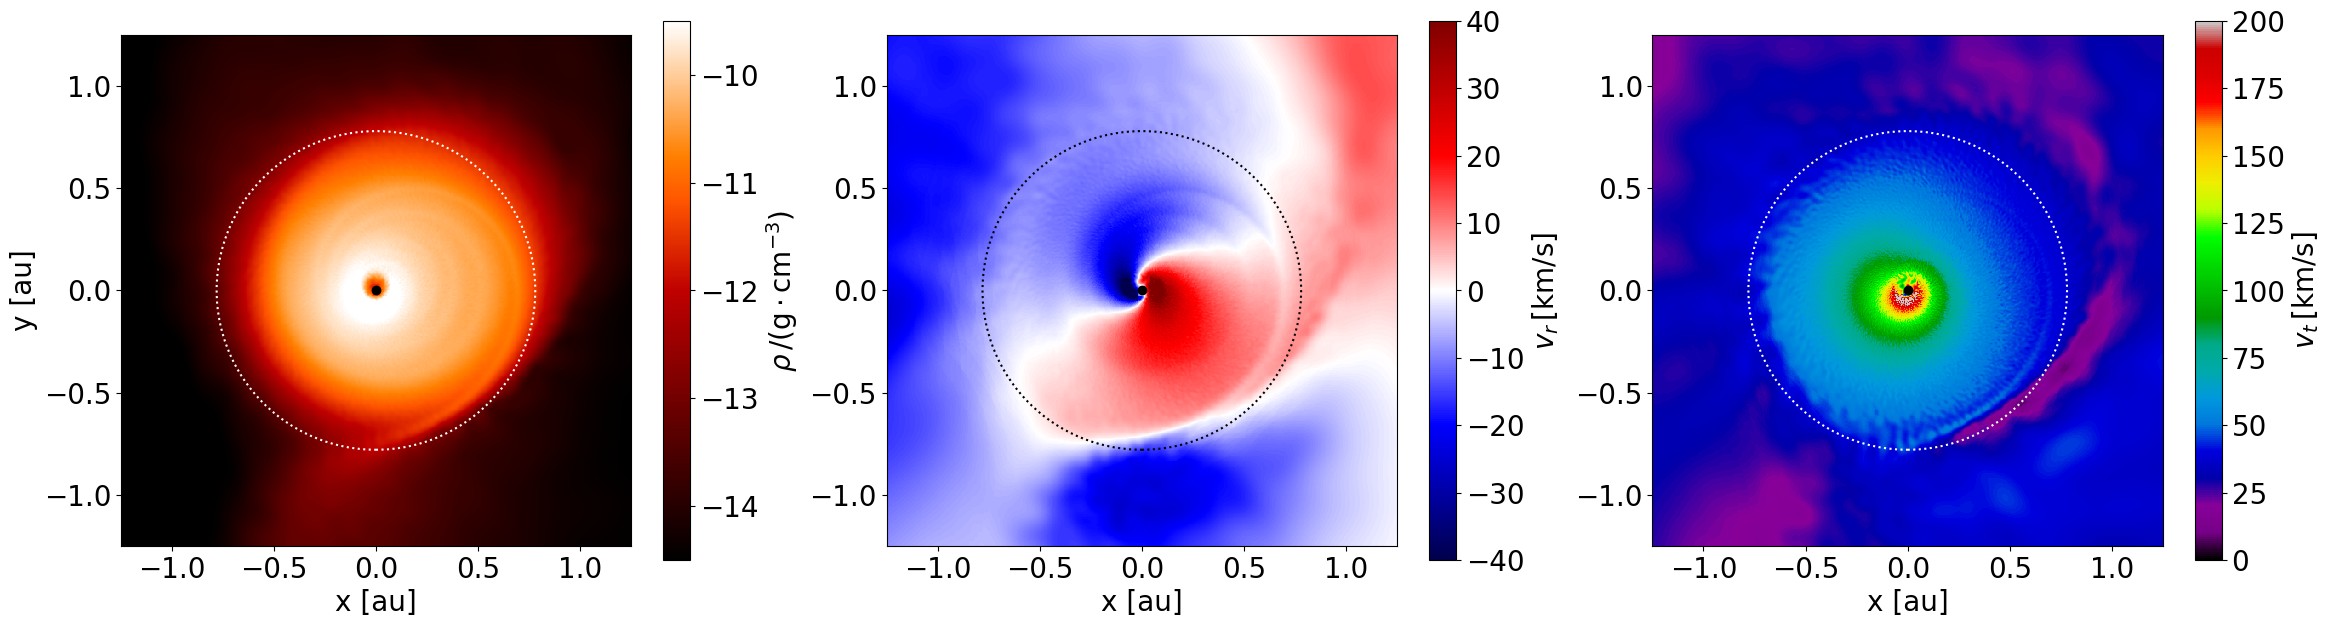

In [4]:
run    = '/STER/hydroModels/jolienm/Pi1Gru/Leen_highRacc/'
dump   = 429
dumpData,setup = ad.loadDataForSmoothing(run,dump)        
r      = 0.78
zoom   = 17
smooth = ad.calcSmoothVtVrRho(zoom,dumpData,setup)
fig, axs = plt.subplots(nrows = 1, ncols= 3 , figsize=(28, 7))
ad.plot_vrvtRho(axs,smooth,zoom,r,[-14.5,-9.5])
fig.savefig(run+f'plotsAnalysis/vrvtRho_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')
plt.show(fig)

Orbital phase is  [1.628]  pi
Orbital phase is  [1.628]  pi


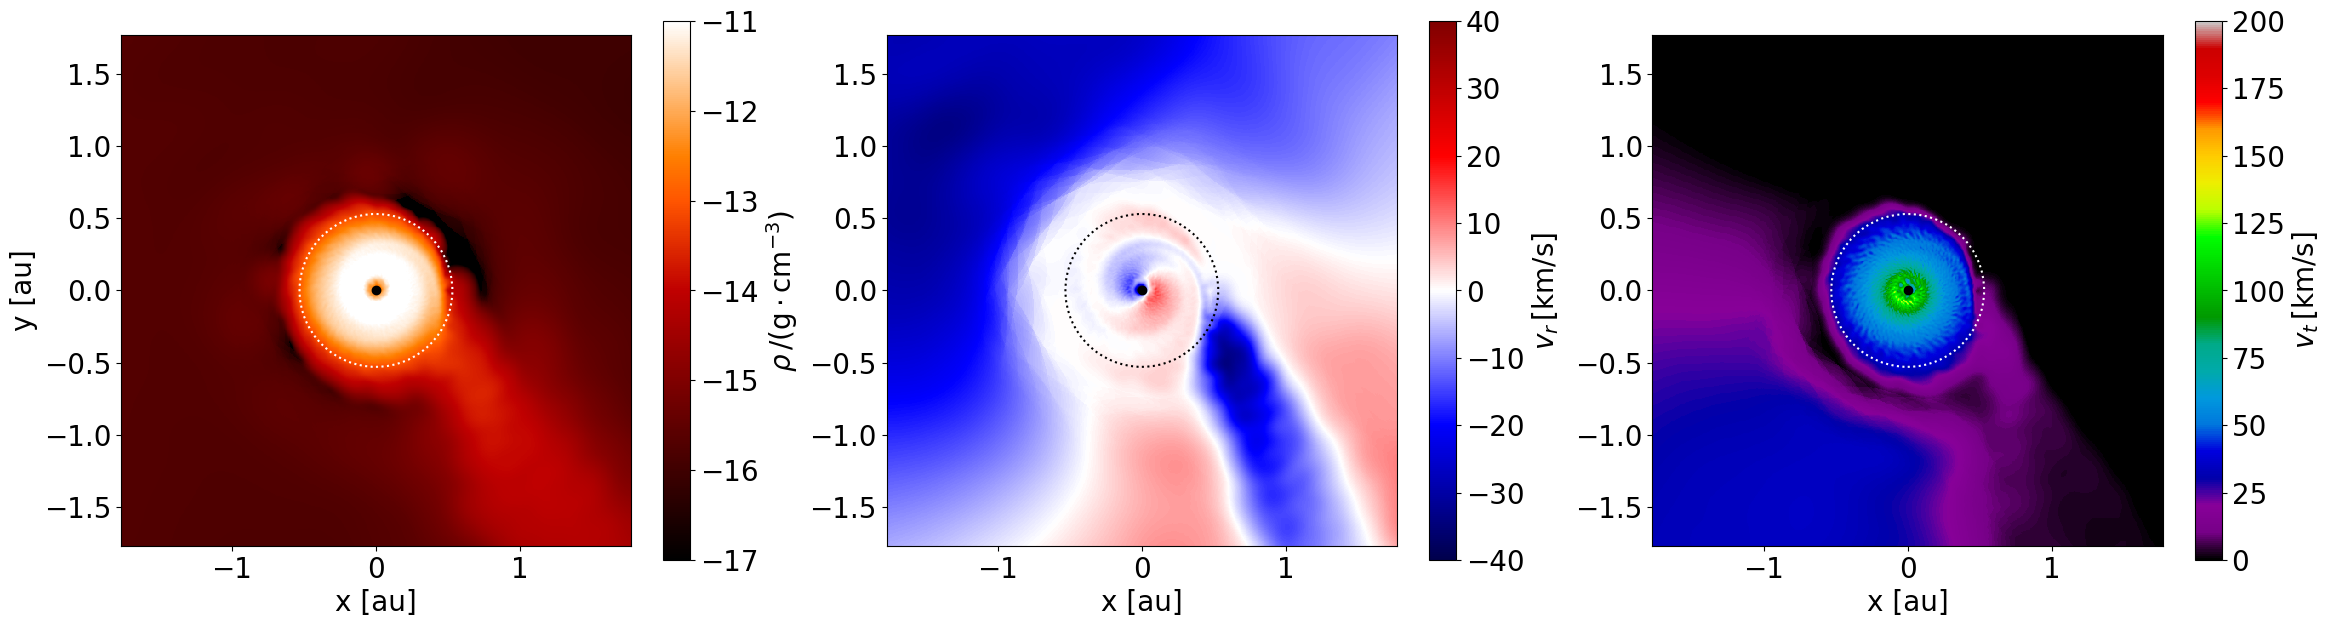

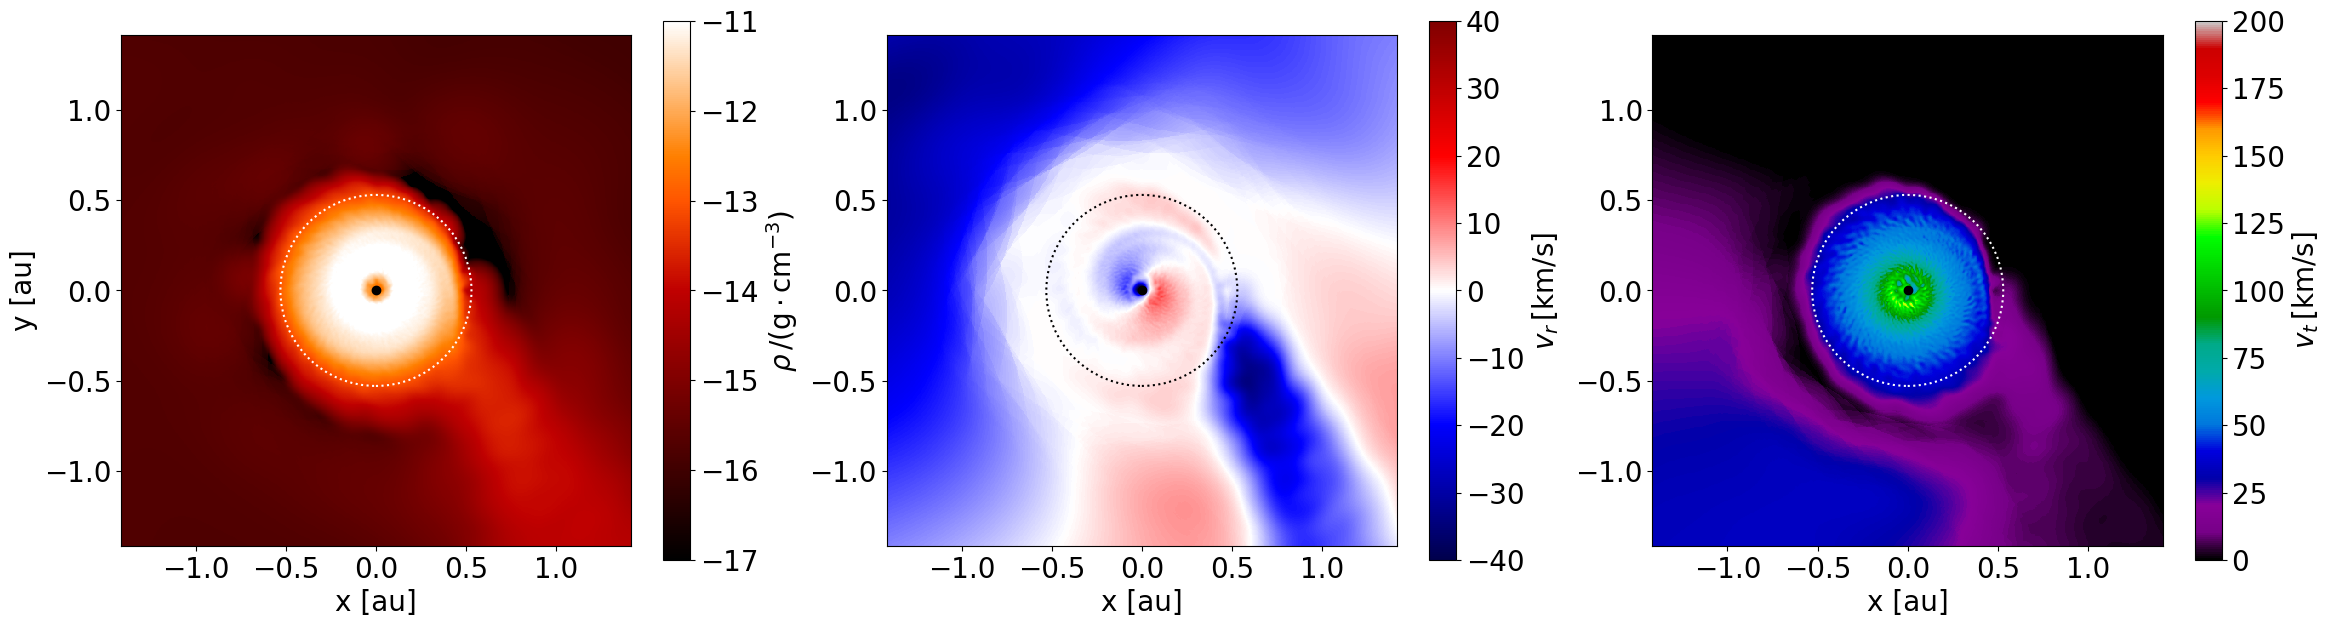

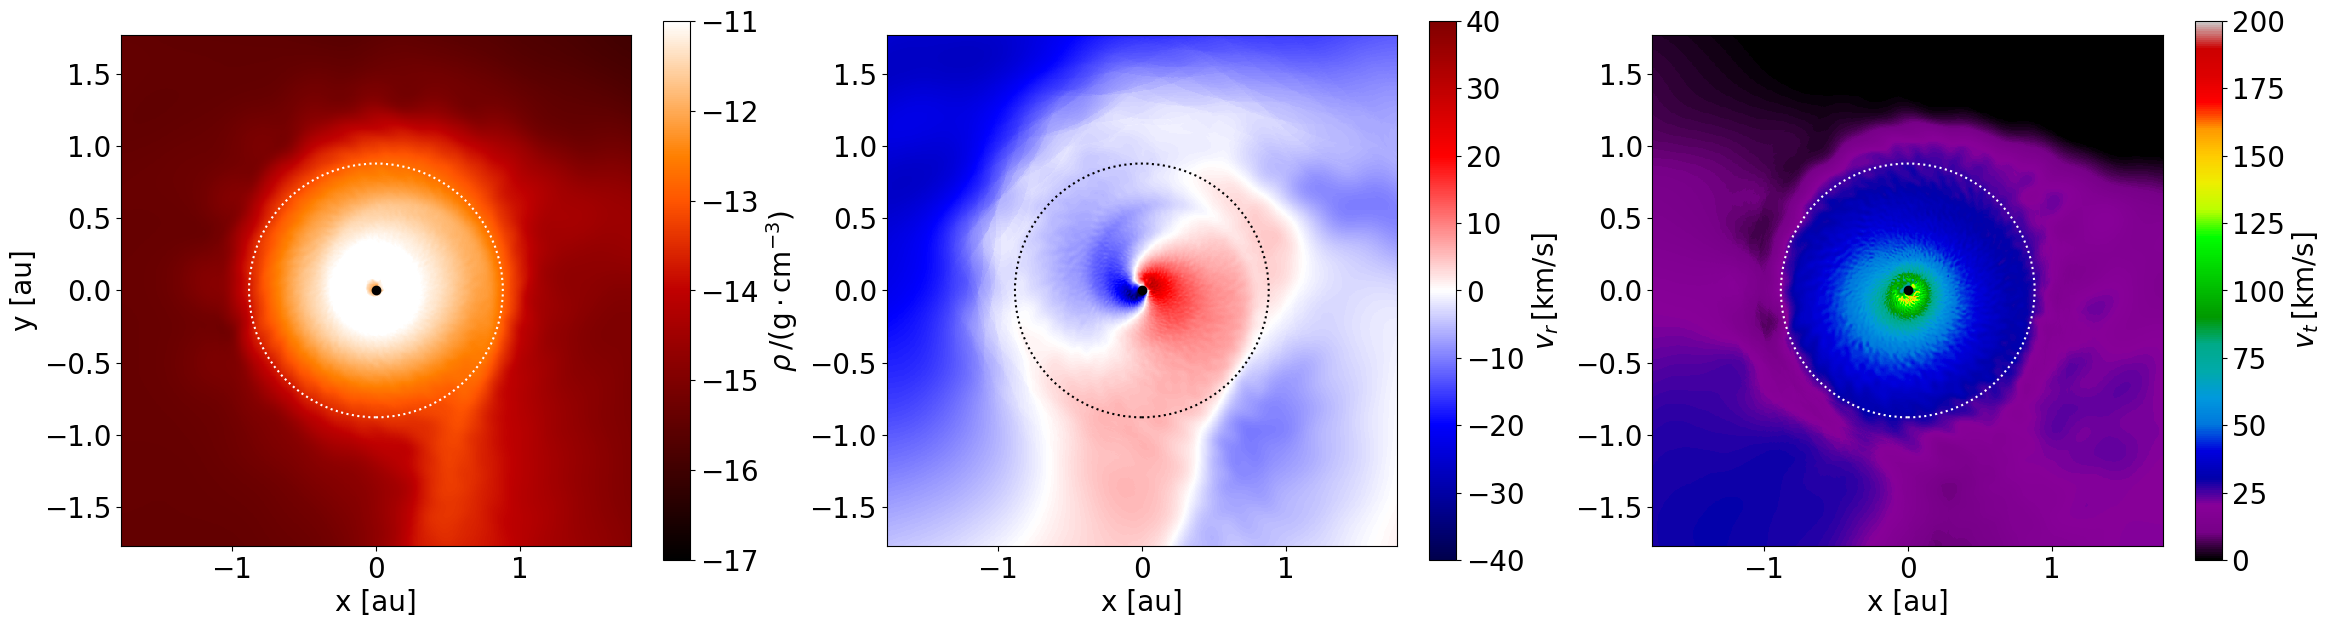

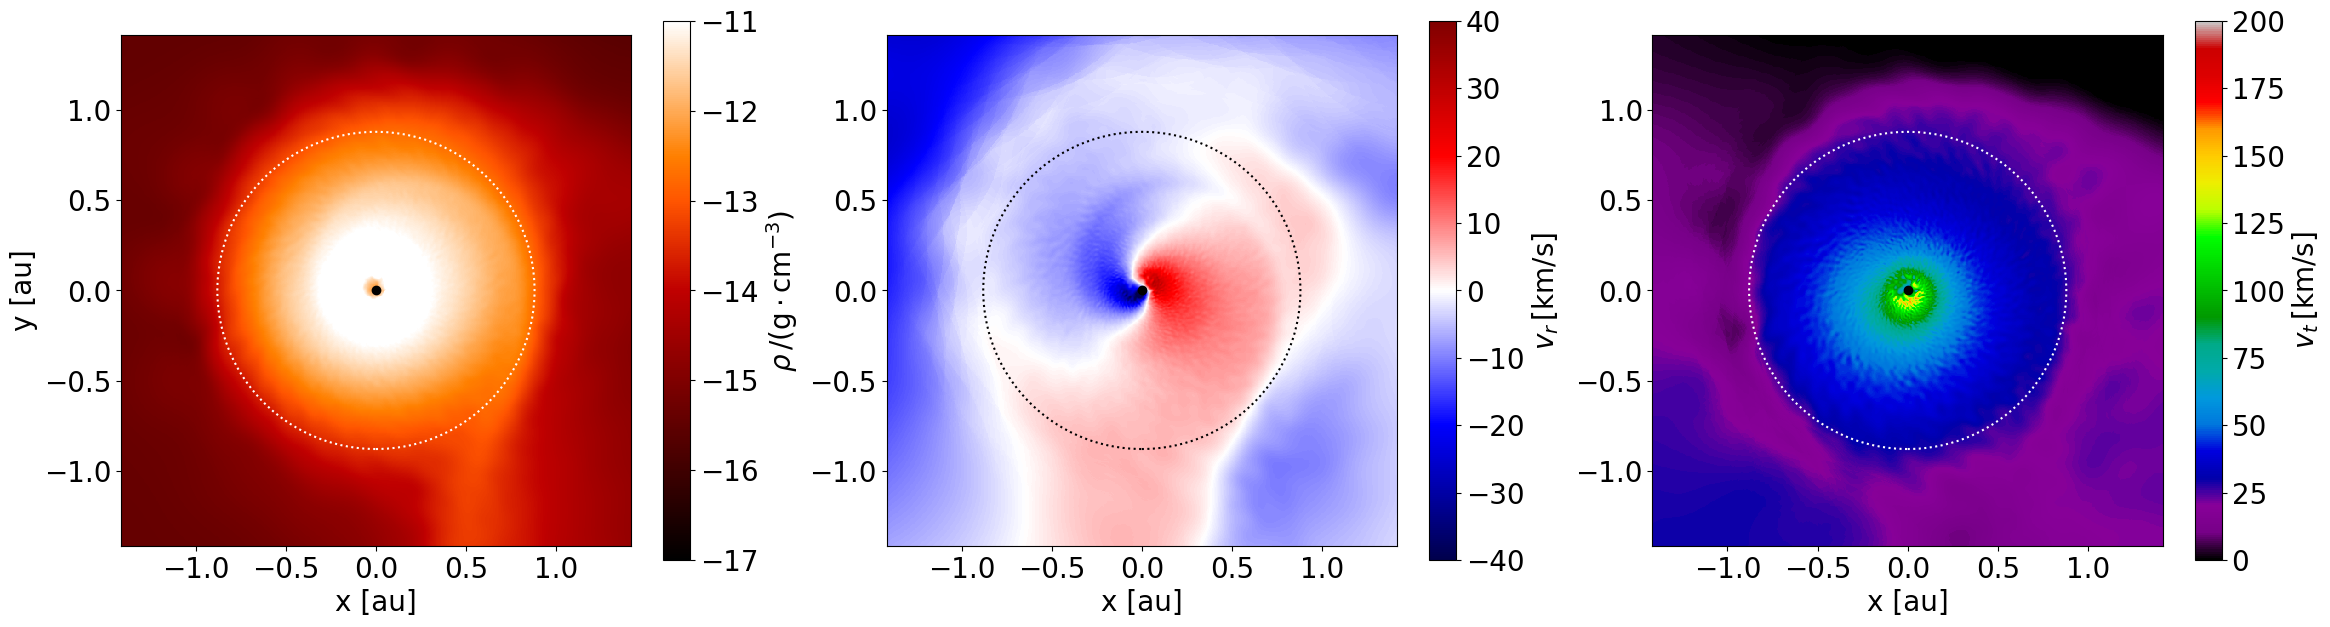

In [14]:

%matplotlib inline 
dir = '/lhome/jolienm/Documents/TierModels/Pi1Gru/models02-2024/'
dump = 500
models = ['M7e-7v19/','M7e-7v14/']
rs     = [0.53,0.88]
zoomChoices = [12,15]#,8.5,2]
i = 0
for model in models:
    run = os.path.join(dir,str(model))
    dumpData,setup = ad.loadDataForSmoothing(run,dump)        
    r = rs[i]
    i = i+1
    for zoom in zoomChoices:
        smooth = ad.calcSmoothVtVrRho(zoom,dumpData,setup)
        fig, axs = plt.subplots(nrows = 1, ncols= 3 , figsize=(28, 7))
        ad.plot_vrvtRho(axs,smooth,zoom,r)
        # plot_vrRho(axs,smooth,zoom,r)
        fig.savefig(run+f'/plotsAnalysis/vrvtRho_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')


In [3]:
import plons.ConversionFactors_cgs        as cgs
import numpy as np

# vr and vt plot w.r.t. companion sink particle
def plot_vrRho(axs,smooth,zoom,r):
    ax2 = axs[0]
    ax3 = axs[1]

    #vr
    data = (smooth['smooth_z']['new_vr'])
    limits = [-40,40]
    # lim = np.abs(np.min(data))
    # limits = [-lim,lim]
    cm  = plt.cm.get_cmap('seismic')
    ax2.set_xlabel('x [au]',fontsize = 20)
    ax2.set_ylabel('y [au]',fontsize = 20)
    ax2.set_aspect('equal')
    ax2.set_facecolor('k')
    ax2.plot(0,0,'o',c = 'k')
    axPlot2 = ax2.pcolormesh(smooth['x_z'] / cgs.au, smooth['y_z'] / cgs.au,
                                    data, cmap=cm, vmin=limits[0], vmax=limits[1])
                       # rasterized=True)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    cbar2 = plt.colorbar(axPlot2)#, cax=cax)
    cbar2.ax.tick_params(labelsize=20)
    cbar2.set_label(r'$v_r \, \rm{[km/s]}$',fontsize = 20)#,rotation = 0)

    # rho
    data = np.log10(smooth['smooth_z']['rho'])
    if zoom == 20:
        # limits = [-16,-10.5]
        limits = [-15,-11]
    else:
        # limits = [-17,-11]
        limits = [-16,-11]
    cm  = plt.cm.get_cmap('gist_heat')

    ax3.set_xlabel('x [au]',fontsize = 20)
    ax3.set_aspect('equal')
    ax3.set_facecolor('k')
    ax3.plot(0,0,'o',c = 'k')
    axPlot3 = ax3.pcolormesh(smooth['x_z'] / cgs.au, smooth['y_z'] / cgs.au,
                                    data, cmap=cm,label='vt', vmin=limits[0], vmax=limits[1])
                       # rasterized=True)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.tick_params(axis='y', labelsize=20)
    cbar3 = plt.colorbar(axPlot3)#, cax=cax)
    cbar3.ax.tick_params(labelsize=20)
    cbar3.set_label(r'$\rho \, \rm{/(g \cdot cm^{-3})}$',fontsize = 20)#,rotation = 0)

    # plot circle with estimate of disk radius
    circle2 = plt.Circle((0, 0), r, color = 'k',linestyle = ':',linewidth = 1.5,fill = False)
    circle3 = plt.Circle((0, 0), r, color = 'w',linestyle = ':',linewidth = 1.5,fill = False)
    ax2.add_patch(circle2)
    ax3.add_patch(circle3)


Orbital phase is  [0.162]  pi


/tmp/ipykernel_56095/2144592320.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm  = plt.cm.get_cmap('seismic')
/tmp/ipykernel_56095/2144592320.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm  = plt.cm.get_cmap('gist_heat')


Orbital phase is  [1.02]  pi
Orbital phase is  [1.77]  pi
Orbital phase is  [2.]  pi


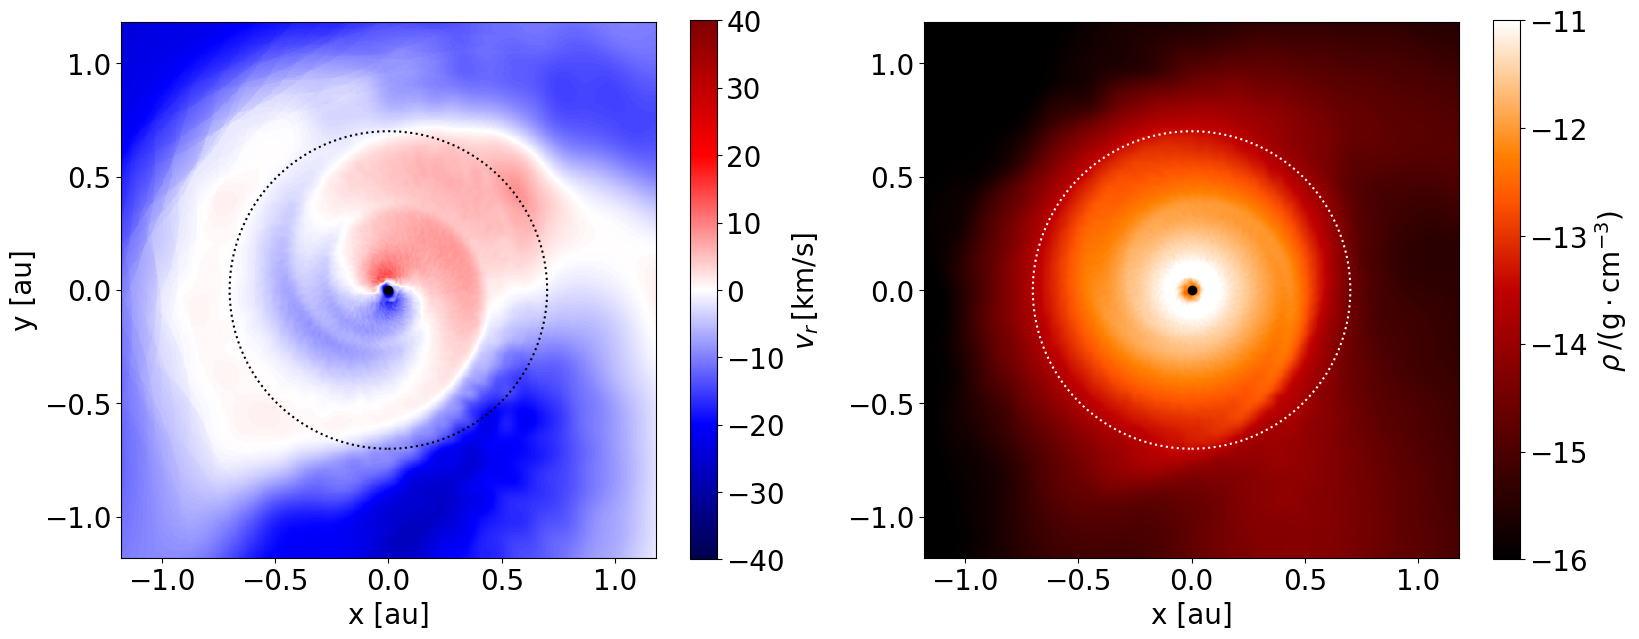

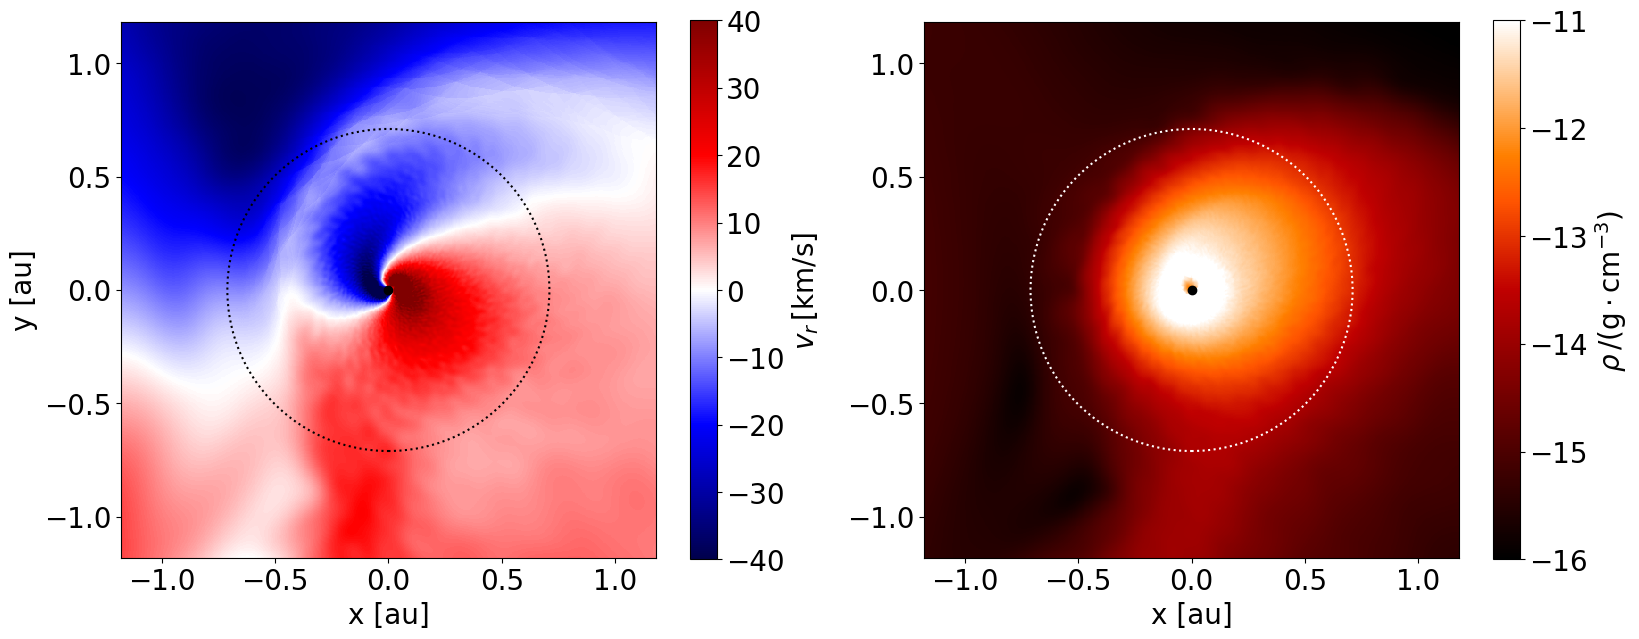

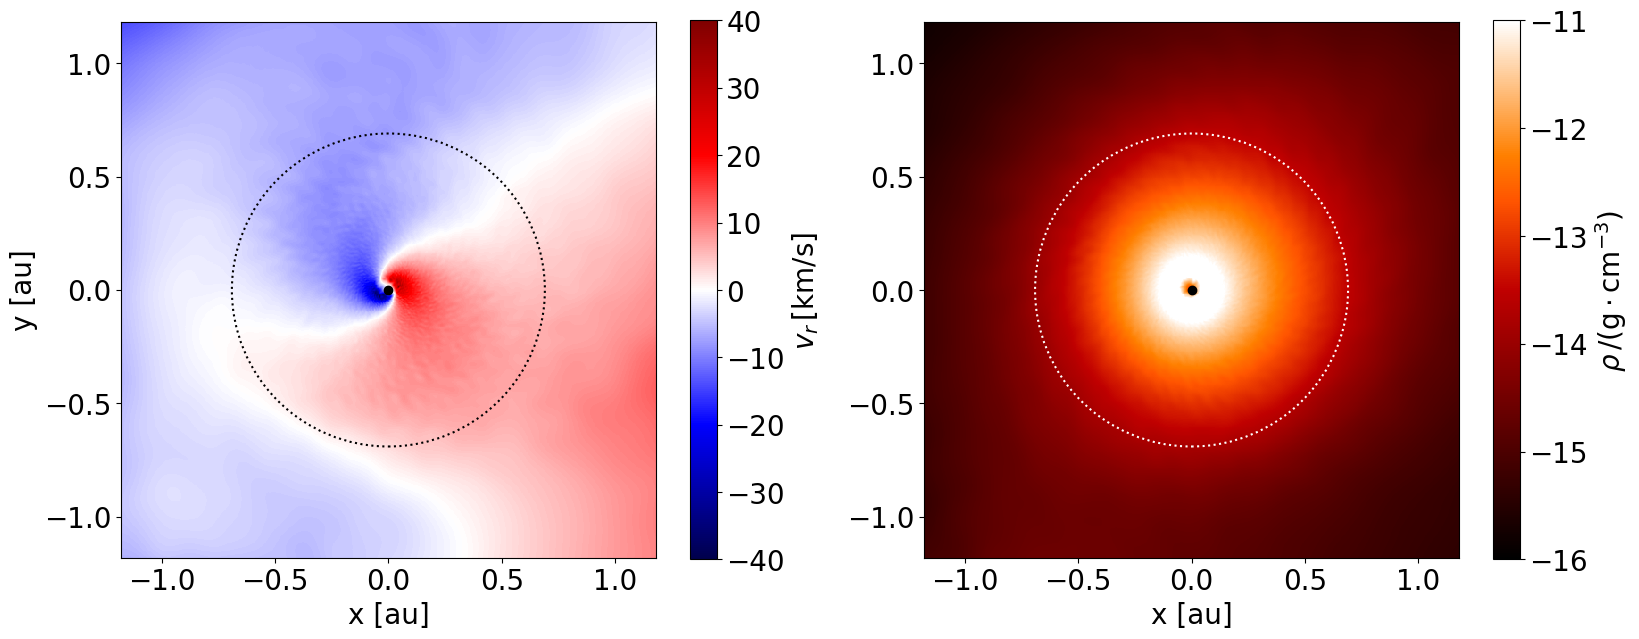

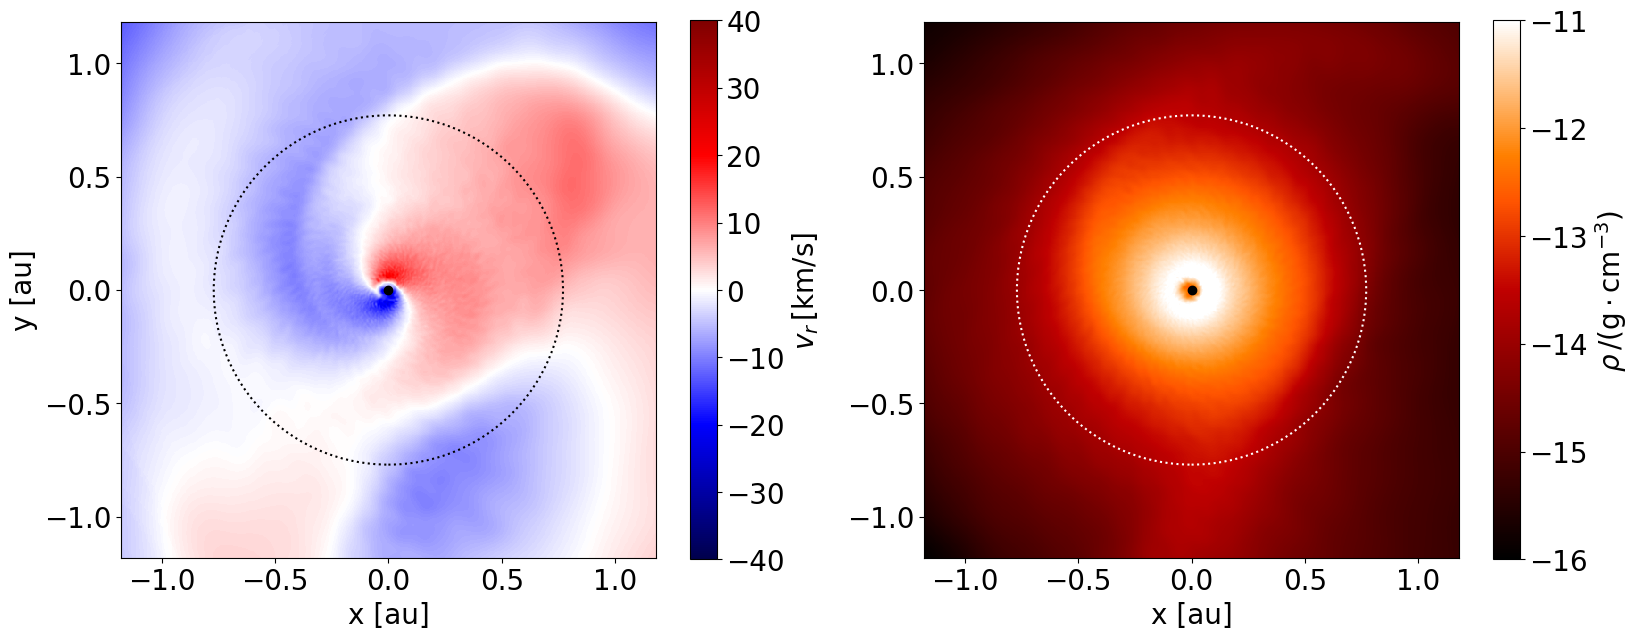

In [4]:
## Example: all eccentric models, 4 different dumps, 4 zoom

%matplotlib inline 
# models = ['v20e50']
# dumps  = [542,558,569,584]
# rs     = [0.49,0.42,0.47,0.40]
# zoomChoices = [20]#,12,8.5,2]
# for model in models:
#     run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/'
#     i = 0
#     for dump in dumps:
#         dumpData,setup = ad.loadDataForSmoothing(run,dump)        
#         r = rs[i]
#         i = i+1
#         for zoom in zoomChoices:
#             smooth = ad.calcSmoothVtVrRho(zoom,dumpData,setup)
#             fig, axs = plt.subplots(nrows = 1, ncols= 2 , figsize=(19, 7))
#             # ad.plot_vrvtRho(axs,smooth,zoom,r)
#             ad.plot_vrRho(axs,smooth,zoom,r)
#             fig.savefig(run+f'plotsAnalysis/vrRho_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')



%matplotlib inline 
models = ['v05e50']
dumps  = [537,555,569,584]
# rs     = [0.67,0.63,0.67,0.90]
rs     = [0.7,0.71,0.69,0.77]
zoomChoices = [12]#[15,8.5,2]
for model in models:
    run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/'
    i = 0
    for dump in dumps:
        dumpData,setup = ad.loadDataForSmoothing(run,dump)        
        r = rs[i]
        i = i+1
        for zoom in zoomChoices:
            smooth = ad.calcSmoothVtVrRho(zoom,dumpData,setup)
            fig, axs = plt.subplots(nrows = 1, ncols= 2 , figsize=(19, 7))
            # ad.plot_vrvtRho(axs,smooth,zoom,r)
            plot_vrRho(axs,smooth,zoom,r)
            fig.savefig(run+f'plotsAnalysis/vrRho_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')



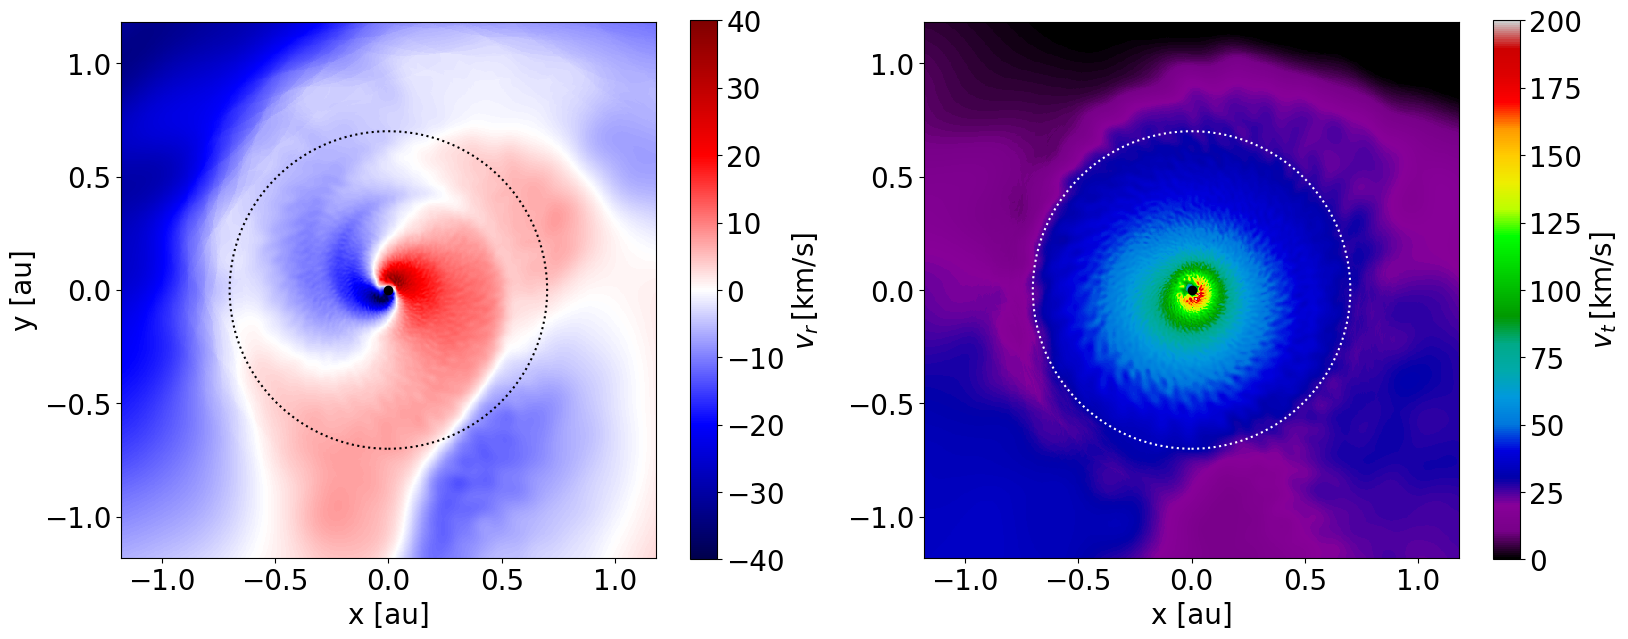

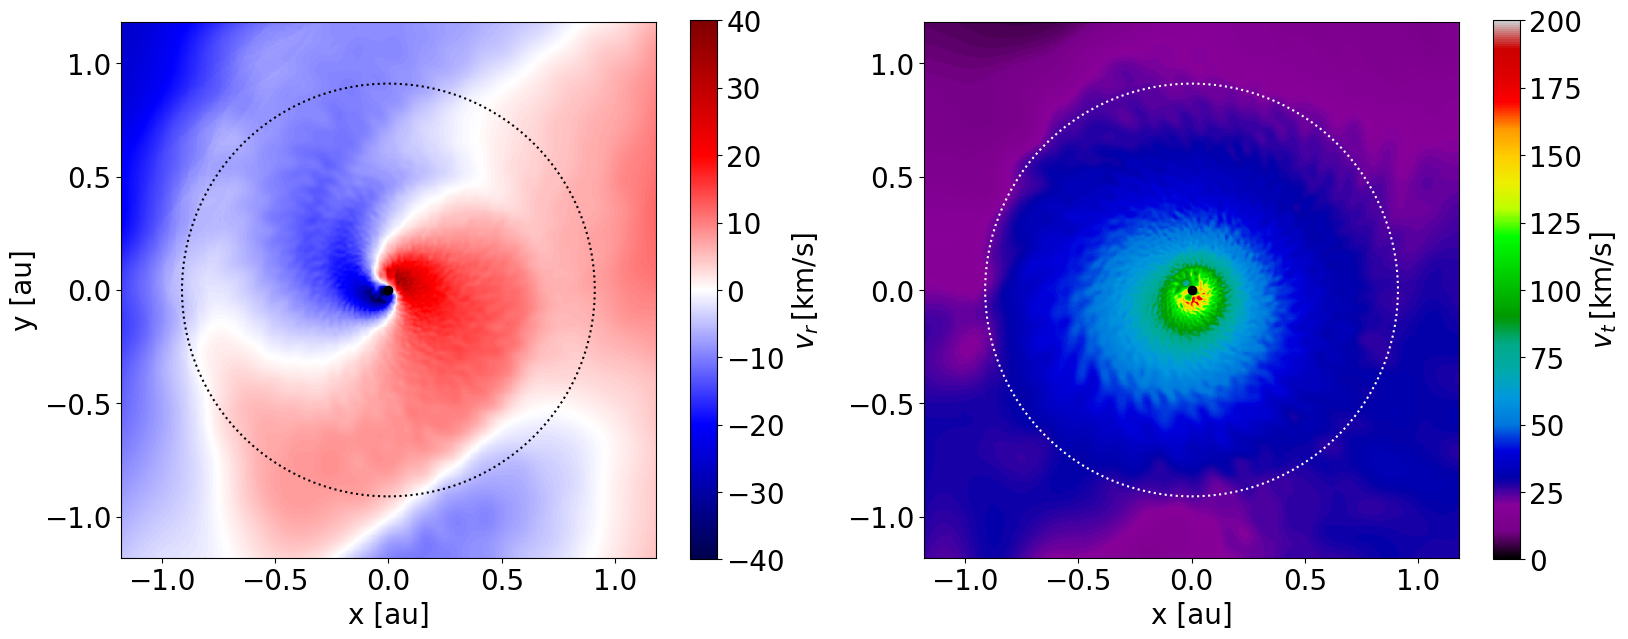

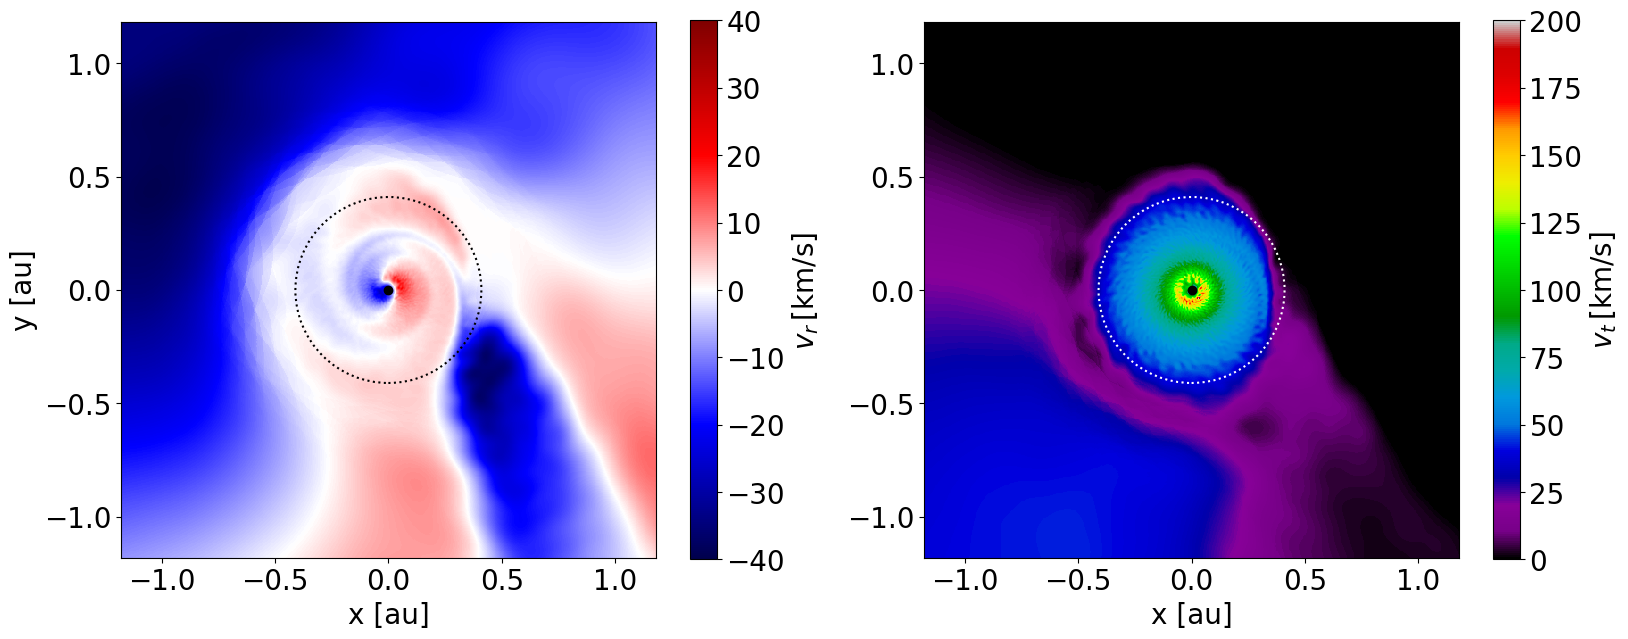

In [4]:
## Example: all circular models, 1 dump, 4 different zoom

%matplotlib inline 

# Load data and calculate smoothened data for sliceplots
dump = 584
models = ['v10e00','v05e00','v20e00']
# models = ['v05e00']
# zoomChoices = [20,12,8.5,2]
zoomChoices = [12]

for model in models:
    if model == 'v20e00':
        # r = 0.36
        r = 0.41
    elif model == 'v10e00':
        # r = 0.75
        r = 0.7
    elif model == 'v05e00':
        # r = 0.94
        r = 0.91
    run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    for zoom in zoomChoices:
        smooth = ad.calcSmoothVtVrRho(zoom,dumpData,setup)
        fig, axs = plt.subplots(nrows = 1, ncols= 2 , figsize=(19, 7))
        ad.plot_vrvt(axs,smooth,zoom,r)
        fig.savefig(run+f'plotsAnalysis/vrvt_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')
        # fig, axs = plt.subplots(nrows = 1, ncols= 3 , figsize=(28, 7))
        # ad.plot_vrvtRho(axs,smooth,zoom,r)
        # fig.savefig(run+f'plotsAnalysis/vrvtRho_op_wind_%05d'%(dump)+'_Z'+str(zoom)+'.png')

        
# zoom  = 20        # for v20e00                          ----> Z1
# zoom = 12         # for v05e00 and v10e00               ----> Z2
# zoom = 8.5        # correct for v05e00 and v10e00       ----> Z3
# zoom = 3                                              # ----> Z10
# zoom = 2                                              # ----> Z15